In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def randomWalk(x): 
    # x is a vector, each element takes a random walk independtly,
    # this function retruns a new vector where each element takes a step by the rule of random walk
    
    dim = np.size(x)
    walk_set = [-1, 1, 0]
    for i in range(dim):
        x[i] = x[i] + np.random.choice(walk_set)
        
    return x

In [3]:
def epsGreedy(epsilon, Q):
    # This function returns an action chosen by epsilon greedy algorithm givent the current action value estimate is Q
    i = np.argmax(Q)
    dim = np.size(Q)
    actionSpace = range(0, dim, 1)
    sample = np.random.uniform(0, 1)
    
    if sample <= 1 - epsilon:
        return i
    else:
        np.delete(actionSpace, i)
        return np.random.choice(actionSpace)

In [8]:
def multiTask(maxIter, taskNumber, epsilon, armNumber, stepSize):
    rows, cols = taskNumber, armNumber
    myMatrix = np.array([([0]*cols) for i in range(rows)])
    constQ = np.array([([0]*cols) for i in range(rows)])
    variaQ = np.array([([0]*cols) for i in range(rows)])
    q=np.array([([0]*cols) for i in range(rows)])
    constN = np.array( [([0]*cols) for i in range(rows)])
    variaN = np.array( [([0]*cols) for i in range(rows)])
    constR = np.zeros(maxIter)
    variaR = np.zeros(maxIter)
    
    for i in range(maxIter):
        for j in range(taskNumber):
            # Random walk for each arm
            taskQ = q[j, :]
            taskQ = randomWalk(taskQ)
            q[j, :] = taskQ
            
            # Constant Stepsize
            taskConstQ = constQ[j,:]
            taskConstN = constN[j,:]
            actionConst = epsGreedy(epsilon, taskConstQ)
            
            rewardConst = taskQ[actionConst]
            constR[i] = constR[i] + rewardConst
            taskConstN[actionConst] = taskConstN[actionConst] + 1
            alpha = stepSize
            difference = rewardConst - taskConstQ[actionConst]
            taskConstQ[actionConst] = taskConstQ[actionConst] + alpha * difference
            constQ[j,:] = taskConstQ
            constN[j,:] = taskConstN
            
            taskVariaQ = variaQ[j,:]
            taskVariaN = variaN[j,:]
            actionVaria = epsGreedy(epsilon, taskVariaQ)
            rewardVaria = taskQ[actionVaria]
            taskVariaN[actionVaria] = taskVariaN[actionVaria] + 1
            
            if i == 0:
                beta = 1
            else:
                beta = 1 / taskVariaN[actionVaria]
            taskVariaQ[actionVaria] = taskVariaQ[actionVaria] + beta * (rewardVaria-taskVariaQ[actionVaria])
            
            variaN[j,:] = taskVariaN
            variaQ[j,:] = taskVariaQ
            variaR[i] = variaR[i] + rewardVaria
        variaR[i] = variaR[i] / taskNumber
        constR[i] = constR[i] / taskNumber
        
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.plot(variaR, color = 'r')
    plt.plot(constR, color = 'b')
    plt.xticks(np.arange(0, maxIter+1100))
    plt.show()
    plt.close()
    print(q)
    print(constQ)
    print(variaQ)

In [9]:
maxIter = 1000
taskNumber = 500
epsilon = 0.1
armNumber = 10
stepSize = 0.1


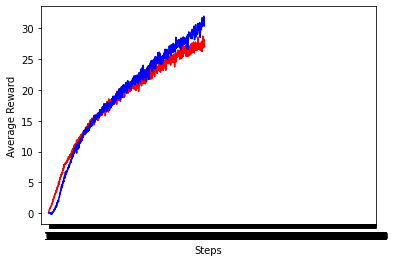

[[ 26  -6   4 ...  30  -8  17]
 [ 18 -15  23 ... -45   2  30]
 [ 10  -2 -12 ... -16 -32  27]
 ...
 [  7 -29 -24 ...  10  -1 -20]
 [  6  32  20 ...   3 -39 -54]
 [-17  33  20 ... -39  -7  26]]
[[ 20  -3   2 ...  14  -4   3]
 [  5  -2   2 ... -19  -1   3]
 [  9   0  -4 ...  -8 -11  10]
 ...
 [  0  -9 -15 ...   0   0  -2]
 [  3  24  11 ...  -5  -5 -16]
 [ -3  12  -2 ... -13   0  10]]
[[  0  -4   5 ...  19  -6   2]
 [  0  -8   4 ... -26  -2   3]
 [  3   1  -4 ...   0 -19  15]
 ...
 [  0 -10 -14 ...   0  -4  -8]
 [  0  18  15 ...  -2 -14 -36]
 [  0  23 -10 ... -17   0  10]]


In [10]:
multiTask(maxIter, taskNumber, epsilon, armNumber, stepSize)